            
# Project: the Movie Database(TMDb) Investigation project
 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#Gen_Prop">General Properties</a></li>
        <li><a href="#Data_Clean">Initial Data Cleaning</a></li>
    </ul>     
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#Question_1">Question 1</a></li>
        <li><a href="#Question_2">Question 2</a></li>
        <li><a href="#Question_3">Question 3</a></li>
        <li><a href="#Question_4">Question 4</a></li> 
    </ul>     
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we will be investigating the TMDb dataset provided by Udacity and Kaggle. This dataset was chosen because of my interest in movies and I wanted to take on a challenge that would help me further understand the Python data packages. I will be observing how the movie industry changed over the years, the most successful directors in the industry, and see what genres are most common in the industry.

We will first start off by importing the packages that we will be using throughout the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

<a id='Gen_Prop'></a>
### General Properties 

We are going to start off by loading our data into a dataframe. We will print out a few values that inspect the datatypes and characteristics of the data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df =pd.read_csv('tmdb-movies.csv', encoding = "UTF-8")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The column titles seem to be self-explanatory. However, the popularity index seemed to be an index that TMDb has generated with their calculation. Going through the TMDb support page, I found an answer from their forum. 

Popularity is a value that gets updated daily and takes a number of things into account like views, number of user ratings/watchlist/favourite additions and release date.

<cite>Elizabeth Jennings- https://www.themoviedb.org/talk/56e614a2c3a3685aa4008121?language=en</cite>

In order to confirm that answer, I generated an correlation matrix and observed its characteristics through an heat map.

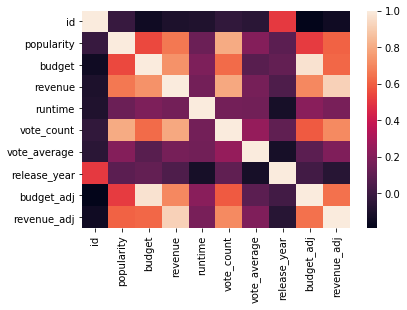

In [4]:
corr =df.corr()
correlation_matrix =sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)


- We confirmed popularity being uncorrelated from metrics such as time(release date, release_year) and runtime. 
- Revenue is more correlated than budget, so we can assume that the movie's success is also important.
- Vote_count is the most closely correlated value. 

<a id='Data_Clean'></a>
### Data Cleaning 

We can see from a glance a few characteristics about this dataset. 
- Special Characters: We have characters '|' that are meant to split the values into multiple values in columns 'cast', 'genre', and 'title'.
- Null values: As the database contains modern information such as websites, there are null values for the older movies.
- Different Datatypes: The columns that are meant to be an equivalent of another such as 'revenue' and 'revenue_adj' are not in the same datatype.

#### Removal of Unused Columns
We will do a preliminary removal of the data columns that we will not be using throughout the dataset investigation.

In [5]:
# As we will not be using the imdb_id, homepage, keywords, and taglines, we will drop these values.
df.drop(['homepage', 'keywords', 'tagline', 'imdb_id', 'production_companies', 'overview', 'runtime'], axis=1, inplace=True)

#### Check Duplicates and remove them
We are expect every value in the dataframe to have a unique id. So we will check duplicates in column id and remove them.

In [6]:
df[df.duplicated(['id'],keep=False)]

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


Check if the duplicates are successfully dropped from the database

In [7]:
df.drop_duplicates(['id'],inplace = True)
df[df.duplicated(['id'],keep=False)]

,id,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


We do not have any duplicates in our dataset now.

### Data Cleaning - Change Datatype
We will change the datatype of the float values into integer values for cleaner representation.


In [8]:
# Since budget and revenue were in integer values, we will change the adjusted values to the datatype to integers
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)


<a id='eda'></a>

## Explanatory Data Analysis 
### Question 1 - Top Grossing Movie Title Each Year

<a id='Question_1'></a>
#### Data Preparation
Now we will answer our questions about this dataset. We are going to start out by observing success of movies in perspective of time. We want to find the top grossing movie each year, so we will do additional data cleaning from the general dataframe we created in the previous section. 

In [9]:
# We will create a copy of our dataframe for actors count. We will remove actors with null data in our analysis for this study. 
df2 = df.copy()
df2.drop(['id','release_date', 'director', 'cast', 'vote_count', 'vote_average','popularity' ], axis=1, inplace=True)
df2 = df2.sort_values('release_year')
max_rev_adj = df2.groupby(['release_year'])['revenue_adj'].transform(max) == df2['revenue_adj']
max_rev = df2.groupby(['release_year'])['revenue'].transform(max) == df2['revenue']
df2[max_rev_adj].head()

,budget,revenue,original_title,genres,release_year,budget_adj,revenue_adj
10143,12000000,60000000,Spartacus,Action|Drama|History,1960,88475609,442378047
10110,4000000,215880014,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,1961,29179444,1574814739
9850,15000000,70000000,Lawrence of Arabia,Adventure|Drama|History|War,1962,108126733,504591421
10438,2500000,78898765,From Russia With Love,Action|Thriller|Adventure,1963,17800448,561773358
9881,3500000,124900000,Goldfinger,Adventure|Action|Thriller,1964,24605935,878080399


We found the top grossing titles for each year using a group_by function in terms of revenue and adjusted revenue. We will now prepare our data for visualization to see where the biggest success in movies happened throughout the years.

In [10]:
# We will save our data in lists for presentation
x_year = []
y_revenue = []
y_revenue_adj = []
for x in range(1960,2016):
    x_year.append(x)
for y in df2[max_rev]['revenue']:
    y_revenue.append(y)
for y in df2[max_rev_adj]['revenue_adj']:
    y_revenue_adj.append(y)

#### Data Visualization

We will generate bar graphs based on revenue and adjusted revenue.

Text(0.5,1,'Revenue Adjusted, in 10 Billion, USD')

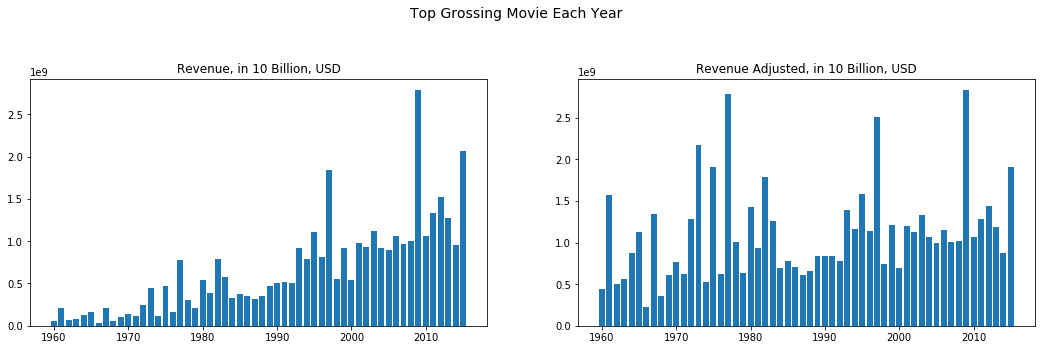

In [11]:
fig=plt.figure(figsize=(18,10))
fig.suptitle("Top Grossing Movie Each Year", fontsize=14)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax1.bar(x_year,y_revenue)
ax2.bar(x_year,y_revenue_adj)
ax1.set_title("Revenue, in 10 Billion, USD")
ax2.set_title("Revenue Adjusted, in 10 Billion, USD")



Looking at the revenue chart, we notice some noteworthy success in movies that overacheived againsts their peers in the 1990's, the 2000's, and the 2010's. From reccollection, we can assume that these movie titles are the 'Titanic', 'Avatar', and 'Star Wars: The Force Awakens'. 

However, if we look to the revenue adjusted to current currency, we can see that there are some noteworthy success in the 1970's that are almost par to the success of 'Avatar' as well. 

This leads us to our second question as we broaden our scope, what are the top grossing movie titles per decade.

<a id='Question_2'></a>
### Question 2 - Top Grossing Movie Title Each Decade

#### Data Preparation
Since we already have a dataframe that we adjusted based on time. We will use the dataframe we used from our previous question. 
We will start off by importing a function to generate the specific decades of each movie.

In [12]:
def decade_converter(x):
    decade = x%1960
    if(decade < 10):
        x= 1960
    elif(decade < 20):
        x= 1970
    elif(decade < 30):
        x= 1980
    elif(decade < 40):
        x= 1990
    elif(decade < 50):
        x= 2000
    elif(decade < 60):
        x= 2010
    return x

Using the function that we created just above, we will assign the movie decades to create a new column in our time dataframe.

In [13]:
ans = []
for x in df2['release_year']:
    ans.append(decade_converter(x))
df2=df2.assign(release_decade=ans)
max_rev_adj = df2.groupby(['release_decade'])['revenue_adj'].transform(max) == df2['revenue_adj']
max_rev = df2.groupby(['release_decade'])['revenue'].transform(max) == df2['revenue']
df2 = df2[max_rev]
df2["movie_decade"] = df2["original_title"].map(str) + " ("+ df2["release_year"].astype(str) + ")"

#### Data Visualization

We will now make a bar graph that will visualize the top grossing movies of each decade in terms of revenue and adjusted revenue.

Text(0.5,0,'Revenue Adjusted (in Billions, USD)')

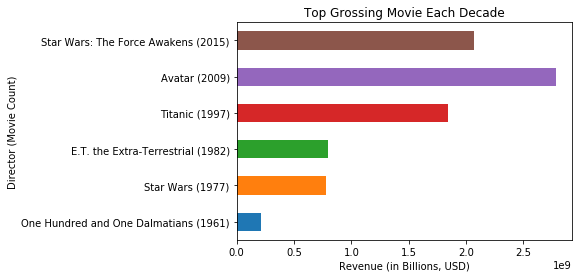

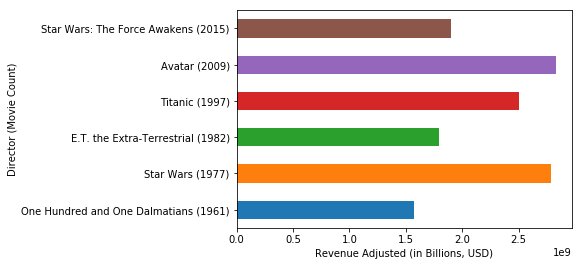

In [14]:
df2.plot(kind='barh', y= 'revenue', x='movie_decade',legend = False)
plt.title("Top Grossing Movie Each Decade")
plt.ylabel("Director (Movie Count)")
plt.xlabel("Revenue (in Billions, USD)")

df2.plot(kind='barh', y= 'revenue_adj', x='movie_decade',legend = False)
plt.ylabel("Director (Movie Count)")
plt.xlabel("Revenue Adjusted (in Billions, USD)")

Our observations from Question 1 - Data Visualization seem to be accurate. If we look at the success of movies in revenue, modern movies seem to be more noteworthy than older ones. However, if we look at movies in adjusted revenue, we can see that older movies such as Star Wars had remarkable successes as well, showing how much of a cultural sensation the movies were in their time period. 

<a id='Question_3'></a>
### Question 3 - Top 10 Directors

#### Data Preparation
For this question, we will now look at the top grossing directors in the film industry. Like we did for our time-based dataframe, we will perform additional data cleaning from the general dataframe. 


In [15]:
# We will create a copy of our dataframe for directors count. 
df3 = df.copy()

# We will remove directors with null data in our analysis for this study. 
df3.dropna(subset=['director'], inplace=True)
df3 = df3.groupby('director').agg({'popularity':'max','revenue': 'sum','revenue_adj': 'sum', 'id': 'count','vote_average': 'median'})
df3 = df3.rename(index=str, columns={"id": "movie_count"})

rev_df3 = df3.sort_values('revenue', ascending = False)
rev_df3 = rev_df3[:10]
rev_df3 = rev_df3.reset_index().sort_values('revenue', ascending= True)
rev_df3.head()

,director,popularity,revenue,revenue_adj,movie_count,vote_average
9,Ridley Scott,7.667400,3649996480,4219565968,23,6.3
8,Tim Burton,5.572950,3665414624,4529285472,19,6.6
7,Chris Columbus,8.021423,3851491668,5094077220,14,6.6
6,Robert Zemeckis,6.715966,3869690869,5655648241,17,6.8
5,David Yates,5.711315,4154295625,4177455258,5,7.3


In [16]:
# We are going to create a new column for the director's movie count, so that we can use that as our x-axis labels.
rev_df3["director_count"] = rev_df3["director"].map(str) + " ("+ rev_df3["movie_count"].astype(str) + ")"

#### Data Visualization

We will now make a bar graph that will visualize the top grossing directors in terms of gross revenue and adjusted revenue.

Text(0.5,0,'Revenue Adjusted (in 10 Billions, USD)')

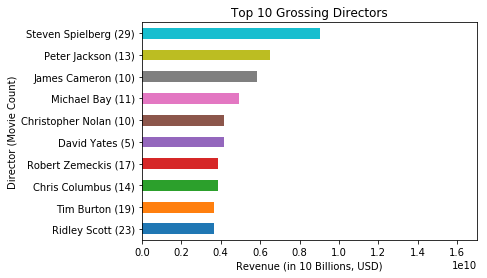

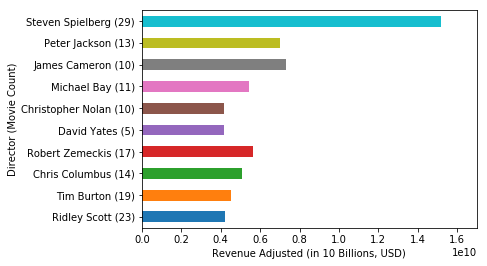

In [17]:
# We will plot our graphs.

rev_df3.plot(kind='barh', y= 'revenue', x='director_count',legend = False,xlim= (0,1.7* 10**10))
plt.ylabel("Director (Movie Count)")
plt.xlabel("Revenue (in 10 Billions, USD)")
plt.title("Top 10 Grossing Directors",)

rev_df3.plot(kind='barh', y= 'revenue_adj', x='director_count',legend = False, xlim= (0,1.7* 10**10))
plt.ylabel("Director (Movie Count)")
plt.xlabel("Revenue Adjusted (in 10 Billions, USD)")


From a glance, we can make some clear observations.
- We can see that many of the top grossing directors has filmed more than 10 films other than David Yates.
    - David Yates only filmed independent and TV films prior to the Harry Potter series. So we can see that the success of the Harry Potter Series helped him become one of the top grossing directors in the industry. 
    
- We can see that Steven Spielberg has grossed more than anyone in the filming industry. However, he also has the largest filmography among the directors.

<a id='Question_4'></a>
### Question 4 - What is the genre distribution?

#### Data Preparation
For this question, we will now look at the most frequent genres in the film industry. 
Like we mentioned in our data-wrangling process, the genres column uses '|' in order to separate the multiple values. 
We will perform additional data cleaning from the general dataframe. 

In [18]:
# We will create a copy of our original dataframe for directors count. 
df4_pre = df.copy()

# We drop the null from the genres.
df4_pre.dropna(subset=['genres'], inplace=True)
df4 = df4_pre['genres']


# We will use a dictionary to keep count of the unique genres.
genre_count = dict()

for x in df4:
    genre_list = x.split('|')
    for genre in genre_list:

        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Convert the dictionary into a list and sort it based on its value.
genre_count =sorted(genre_count.items(), key=lambda x: x[1], reverse= True)
genre_df = pd.DataFrame(genre_count, columns=['Genre', 'Genre_count'])
genre_df


,Genre,Genre_count
0,Drama,4760
1,Comedy,3793
2,Thriller,2907
3,Action,2384
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1354
8,Family,1231
9,Science Fiction,1229


As we have around 20 unique types of genres, we think its best to use a pie chart to clearly visualize the distribution. Since 20 slices will be too much, we will keep the top 9 genres and combine the others into an 'others' category.

In [19]:
# Assign parameters
topN = 9 
other_count =0

# Combine the others category
for x in range(topN+1,len(genre_df)):
    other_count += genre_df['Genre_count'][x]
genre_other_df = pd.DataFrame([["Others", other_count]], columns=['Genre', 'Genre_count'])

# Concatenate the original date from up to the topN and append the others dataframe
genre_df_conc = genre_df[:topN].append(genre_other_df, ignore_index=True)

#### Data Visualization

We will now make a pie chart and a table to see the individual counts of each unique genre.

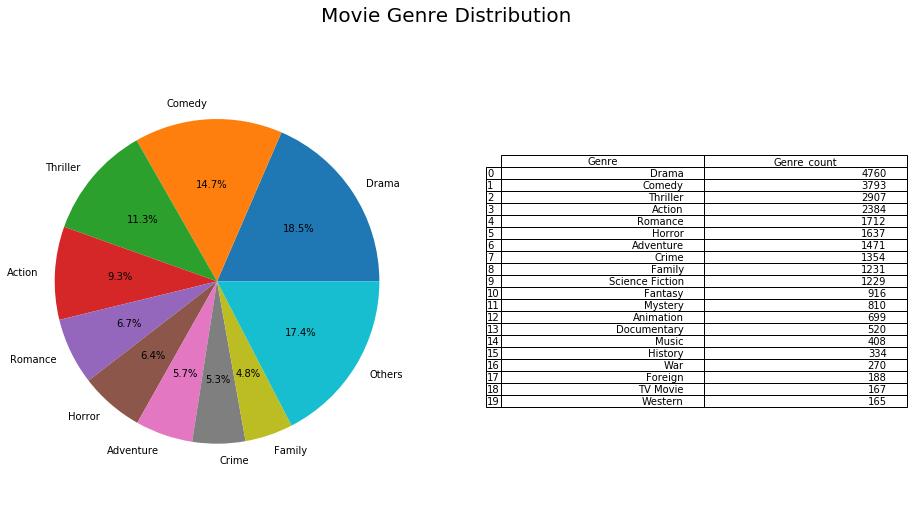

In [20]:
# Create plot figure 
fig =plt.figure(figsize=(16,8))
fig.suptitle("Movie Genre Distribution", fontsize=20)

# plot chart on subplot 1
ax1 = plt.subplot(121, aspect='equal')
genre_df_conc.plot(kind='pie', y = 'Genre_count', ax=ax1, autopct='%1.1f%%', labels=genre_df_conc['Genre'], legend = False)

# removed the y-label that was intersecting with the pie labels.
ax1.set_ylabel('')

# plot table on subplot 2
ax2 = plt.subplot(122)
plt.axis('off')
# Used original dataframe to show the whole list of unique genres
tbl = pd.plotting.table(ax2, genre_df, loc='center')
plt.show()

This question is straight forward. The most popular movie genres were drama, comedy, thriller, action, and romance. 

<a id='conclusions'></a>
## Conclusions
### Overview of Investigation 
Through rigorous data examination, we were able to reach multiple conclusions about the questions we had about the dataset.
- We found out the most popular movie titles and their revenue for each year
- We found out the most popular movie titles and their revenue for each decade
- We found out the most successful directors
- We found out which movie genres were most frequent

### Further Studies
There were many more investigations that I wanted to make in the project. One question that I was going to further dwelve into was the frequent genre combinations. At first, I thought the data was in alphabetical order, so I was going to use an apriori algorithm to find the frequent itemsets. However, I found out that later on after finding errors in the apriori results that the was not in alphabetical order, so I was not able to perform apriori. If given extra time, I would sort each row's genre column by alphabetical order to test the algorithm.  


